## GRIP - The Sparks Foundation
### Data Science and Businness Analytics Intern
### Author : Dharmik Vara
### Task 2 : Prediction using Unsupervised ML

Problem : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop Id column as it's unique and not helpful in predicting species

data = data.drop('Id', axis=1)

In [4]:
data.Species.nunique()

3

In [5]:
# Unique Categorial Values

data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
species = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [7]:
# Encoding Categorical values

data.Species = data.Species.map(species)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Dropping Species columns

X = data.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Model fitting and predicting clusters

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 101, )
# n_clusters is chosen 3 as there are 3 categories in species but we'll verify our selection using elbow method
pred = model.fit_predict(X)

In [10]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
# Coordinates of cluster centers

model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

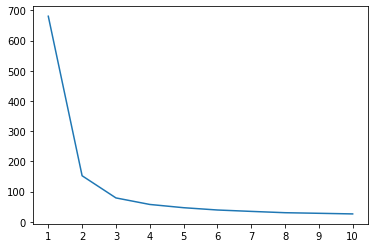

In [12]:
# Finding optimum clusters values using elbow method though we already know 

wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(np.arange(1,11,1))
plt.show()

It can be seen that optimal number of clusters are 3 as there is not much dropping in values afterwards, therefore we previously trained the model on correct value.

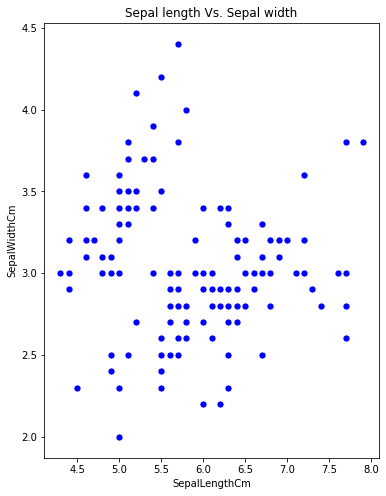

In [13]:
# Plotting Layout of data

plt.figure(figsize = (6,8))
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=data, s=50, color='Blue')
plt.title('Sepal length Vs. Sepal width')
plt.show()

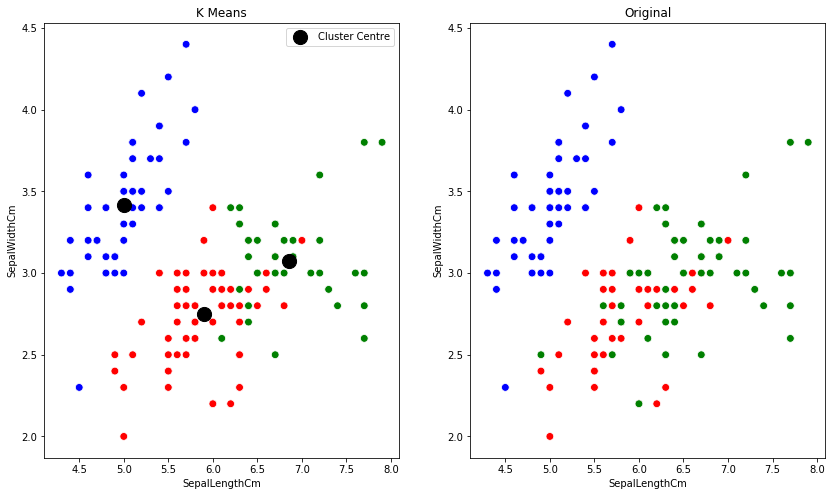

In [14]:
# Comparing Orignal Vs. Predicted Clusters

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('K Means')
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=data, hue=pred, s=60, palette=['Red','Blue', 'Green'], legend=False)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=200,label='Cluster Centre')
plt.legend()
plt.subplot(1,2,2)
plt.title("Original")
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=data, hue='Species', s=60, palette=['Blue','Red','Green'], legend=False)
plt.show()

There is only some error in prediction but more than 90% of data is grouped accurately